In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

url = r"C:\Users\basde\Downloads\les24_bestanden\kingCountyHouseData.csv"
df = pd.read_csv(url,sep=",")
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


In [15]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5, random_state = 0)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print(score)

0.5558073822490773


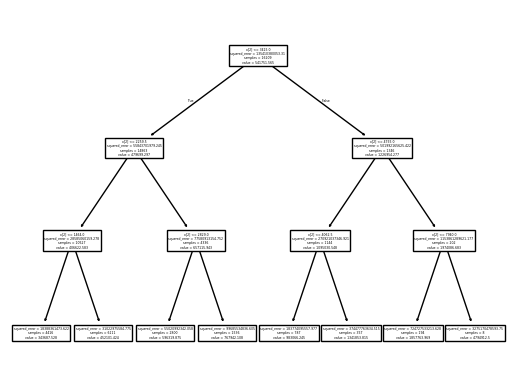

In [9]:
tree.plot_tree(reg);

In [7]:
depth=3
reg = DecisionTreeRegressor(max_depth = depth,
random_state = 0)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
# Bad practice: train and test the model on the same data
print(reg.score(X_train, y_train))

0.5209625507176909
0.5338772153334583


In [12]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 25))

# List to store the average RMSE for each value of max_depth:
r2_test_list = []
r2_train_list = []

for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
        random_state = 0)
    reg.fit(X_train, y_train)

    score = reg.score(X_test, y_test)
    r2_test_list.append(score)

    # Bad practice: train and test the model on the same data
    score = reg.score(X_train, y_train)
    r2_train_list.append(score)

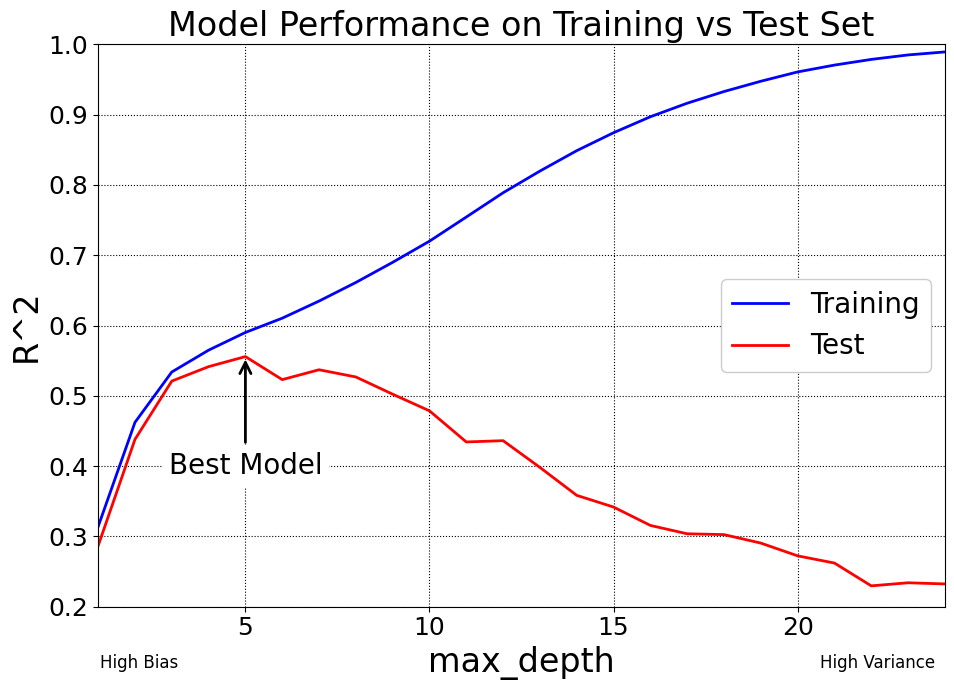

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), facecolor = 'white');

ax.plot(max_depth_range,
    r2_train_list,
    lw=2,
    color='b',
    label = 'Training')

ax.plot(max_depth_range,
    r2_test_list,
    lw=2,
    color='r',
    label = 'Test')

ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
    axis = 'both',
    zorder = 0,
    linestyle = ':',
    color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_ylim(.2,1)

ax.legend(loc = 'center right', fontsize = 20, framealpha = 1)
ax.annotate("Best Model",
    xy=(5, 0.5558073822490773), xycoords='data',
    xytext=(5, 0.4), textcoords='data', size = 20,
    arrowprops=dict(arrowstyle="->",
        connectionstyle="arc3",
        color = 'black',
        lw = 2),
    ha = 'center',
    va = 'center',
    bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5} )

ax.set_title('Model Performance on Training vs Test Set', fontsize = 24)

# Annotating by figure fraction for ease because i want it outside the plotting area.
ax.annotate('High Bias',
    xy=(.1, .032), xycoords='figure fraction', size = 12)

ax.annotate('High Variance',
    xy=(.82, .032), xycoords='figure fraction', size = 12)

temp = ax.get_xlim()
temp1 = ax.get_ylim()

fig.tight_layout()
#fig.savefig('images/max_depth_vs_R2_Best_Model.png', dpi = 300)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with all three features
# instantiate model
lm = LinearRegression()
# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-7.31169923e+10 -7.53268420e+10 -6.03793166e+10 -7.69229171e+10
 -5.73343363e+10 -6.05865594e+10 -5.95728519e+10 -6.68448731e+10
 -6.58003586e+10 -6.83818605e+10]


In [17]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[7.31169923e+10 7.53268420e+10 6.03793166e+10 7.69229171e+10
 5.73343363e+10 6.05865594e+10 5.95728519e+10 6.68448731e+10
 6.58003586e+10 6.83818605e+10]
[270401.53894905 274457.35912182 245722.03111307 277349.81005172
 239445.8942425  246143.37158588 244075.50458465 258543.7547387
 256515.80577787 261499.25518089]
257415.4325346158
